<a href="https://colab.research.google.com/github/JennyMyy/Data-analytiikka/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Yhdistetään Google driveen

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/data


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax = 100, decimals = 0, symbol = ' %')

## Sanakirja taulukoiden muotoiluuun
## lukumäärä-sarakkeeseen nolla desimaalio, %-sarakkeeseen yksi desimaali

format = {'lkm' : '{:.0f}', '%' : '{:.1f} %'}

#Titanic matkustajat

In [13]:
# Luetaan tiedosto
df = pd.read_excel('titanic.xlsx')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [15]:
## Sukupuolijakauma
df1 = pd.crosstab(df['sex'], 'lkm')
df1.columns.name = ''
n = df1['lkm'].sum()
df1['%'] = df1['lkm']/n*100
df1.loc['Total'] = df1.sum()

# decimaalien muotoilu
df1.style.format(format)

,lkm,%
sex,,
female,466,35.6 %
male,843,64.4 %
Total,1309,100.0 %


Matkustajia ollut yhteensä 1309 ja enempi miehiä kuin naisia.

In [16]:
# sukupuoli jakauma selviytyneet ja menehtyneet
df1 = pd.crosstab(df['sex'], df['survived'])
selviytyneet = ['no', 'yes']

df1.columns = selviytyneet
df1.columns.name = 'survived'

df1.loc['Total'] = df1.sum()
df1

survived,no,yes
sex,,
female,127,339
male,682,161
Total,809,500


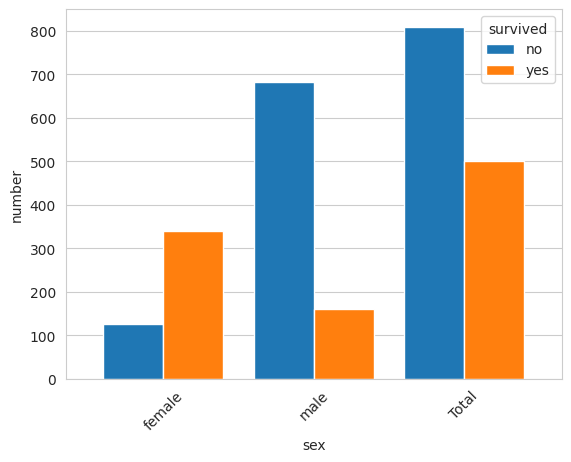

In [25]:
# Ristiintaulukointi pylväinä
df1.plot(kind='bar', width=0.8, rot=45)

plt.ylabel('number')
plt.grid(axis='x')

Laivalla menehtyneitä 809 ja selviytyneitä 500, joista selviytyi enemmän naisia.

In [24]:
df.nlargest(1, 'body')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ageclass
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"(10, 20]"


Löydetty 328 ruumista ja 481 henkilöä jäi kadoksiin.

#Ikäjakauma

In [17]:
# iän luokittelu
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['ageclass'] = pd.cut(df['age'], bins=bins)

df2 = pd.crosstab(df['ageclass'], 'lkm')
df2.columns.name = ''
df2

,lkm
ageclass,
"(0, 10]",86
"(10, 20]",162
"(20, 30]",361
"(30, 40]",210
"(40, 50]",132
"(50, 60]",62
"(60, 70]",27
"(70, 80]",6


([<matplotlib.axis.XTick at 0x78ae341cc250>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

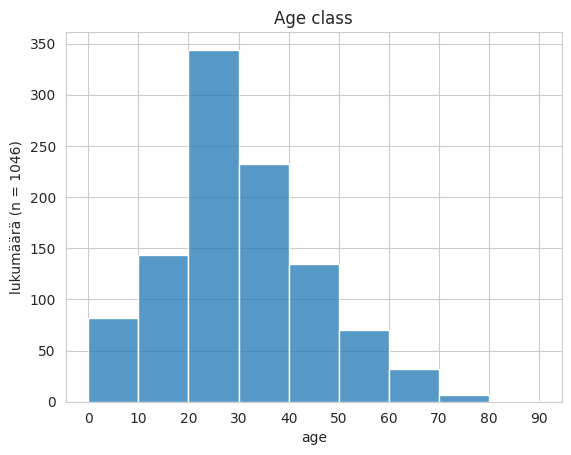

In [18]:
plt.title('Age class')
sns.histplot(df['age'], bins=bins)

plt.ylabel(f'lukumäärä (n = {df["age"].count()})')

# x-akselille luokkien rajakohdat
plt.xticks(bins)

Ikäjakaumasta nähtävillä matkustajia olleen eniten 20-30 vuotiaita.

# Hyttien jakautuminen

In [19]:
df3 = pd.crosstab(df['pclass'], 'lkm')
hytit = ['first', 'second', 'third']
df3.columns.name = ''
df3.index= hytit
df3.index.name = 'Hytit'
df3['%'] = df3['lkm']/df3['lkm'].sum()*100

df3.loc['Total'] = df3.sum()

df3.style.format(format)

,lkm,%
Hytit,,
first,323,24.7 %
second,277,21.2 %
third,709,54.2 %
Total,1309,100.0 %


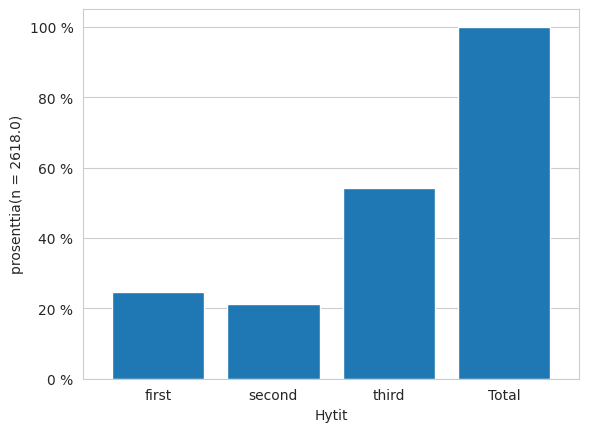

In [20]:
# Hyttien frekvenssitaulukko prosenteissa kaaviossa

df3['%'].plot(kind='bar', width=0.8, rot=0)

plt.ylabel(f'prosenttia(n = {df3["lkm"].sum()})')
plt.gca().yaxis.set_major_formatter(ticks)

plt.grid(axis='x')

Yli puolet matkustajista matkustaneet kolmannessa luokassa laivalla.

In [31]:
# Henkilöt, jotka matkustivat perheen jäsenen kanssa.

df[df['sibsp']!=0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ageclass
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0.0, 10.0]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0.0, 10.0]"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","(20.0, 30.0]"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(20.0, 30.0]"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY","(60.0, 70.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,"(40.0, 50.0]"
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0000,1,0,2659,14.4542,NaN,C,C,NaN,NaN,"(20.0, 30.0]"
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN,"(10.0, 20.0]"
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"(10.0, 20.0]"


In [34]:
df[(df['parch']!=0) & (df['age']< 18)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ageclass
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA","(10, 20]"
55,1,1,"Carter, Miss. Lucile Polk",female,14.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA","(10, 20]"
94,1,1,"Dodge, Master. Washington",male,4.0000,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA","(0, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,3,1,"Thomas, Mrs. Alexander (Thamine ""Thelma"")",female,16.0000,1,1,2625,8.5167,NaN,C,14,NaN,NaN,"(10, 20]"
1256,3,1,"Touma, Master. Georges Youssef",male,7.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,"(0, 10]"
1257,3,1,"Touma, Miss. Maria Youssef",female,9.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,"(0, 10]"
1263,3,0,"van Billiard, Master. Walter John",male,11.5000,1,1,A/5. 851,14.5000,NaN,S,NaN,1.0,NaN,"(10, 20]"


418 henkilöä matkusti perheen jäsenen kanssa, joista lapsia oli 112.